In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dow_jones_raw = pd.read_csv("../data/dow_jones_index.data")

In [3]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
dow_jones_raw.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

## Clean the data.
* Convert dollars to float64 (sometimes it is more cost efficient to convert to int by multiplying by 100)
* Convert date to datetime and reindex

In [5]:
dow_jones_raw.loc[:, ('open')] = dow_jones_raw['open'].astype('str').str.strip('$')

In [6]:
dollars=[]
for column in dow_jones_raw.columns:
    if column =='stock' or column =='date':
        continue
    elif dow_jones_raw[column].dtype == 'object':
        dollars.append(column)
    else:
        continue

In [7]:
for name in dollars:
    dow_jones_raw.loc[:, (name)] = dow_jones_raw[name].astype('str').str.strip('$').astype('float64')

In [8]:
dow_jones_raw.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [9]:
dow_jones_raw['stock'].unique()

array(['AA', 'AXP', 'BA', 'BAC', 'CAT', 'CSCO', 'CVX', 'DD', 'DIS', 'GE',
       'HD', 'HPQ', 'IBM', 'INTC', 'JNJ', 'JPM', 'KRFT', 'KO', 'MCD',
       'MMM', 'MRK', 'MSFT', 'PFE', 'PG', 'T', 'TRV', 'UTX', 'VZ', 'WMT',
       'XOM'], dtype=object)

In [10]:
dow_jones_raw['date'] = pd.to_datetime(dow_jones_raw['date'])

In [11]:
dow_jones_raw.set_index(['date'], inplace = True)

In [12]:
a_few_companies = dow_jones_raw[(dow_jones_raw['stock'] == 'AA') | 
                                (dow_jones_raw['stock'] == 'BA' )|
                                (dow_jones_raw['stock'] == 'GE') |
                                (dow_jones_raw['stock'] == 'JNJ')|
                                (dow_jones_raw['stock'] == 'PG')
                               ]
a_few_companies.sort_index(inplace=True)

C:\Users\rhall\AppData\Local\Continuum\anaconda3\envs\algoprojs\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


C:\Users\rhall\AppData\Local\Continuum\anaconda3\envs\algoprojs\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(734144.0, 734312.0)

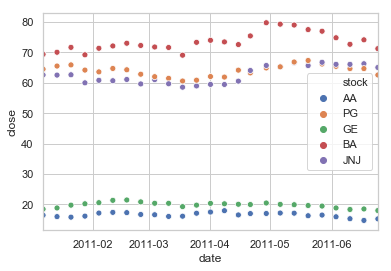

In [13]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="close",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')

In [14]:
## TODO break apart different features and compare

(734144.0, 734312.0)

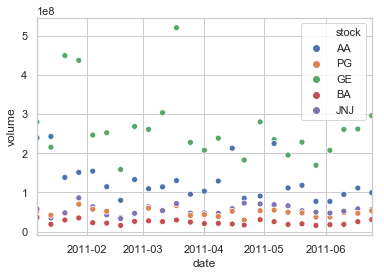

In [15]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="volume",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')

(734144.0, 734312.0)

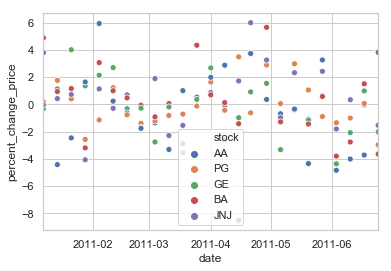

In [16]:
sns.set(style="whitegrid")
ax = sns.scatterplot(x=a_few_companies.index, 
                     y="percent_change_price",
                     hue = 'stock',
                     data=a_few_companies
                    )
plt.xlim('2011-01-07', '2011-06-24')

## Investigate FeatureTools

In [2]:
import featuretools as ft
from graphviz import *

In [3]:
data = ft.demo.load_mock_customer()

In [4]:
transactions_df = data["transactions"].merge(data["sessions"]).merge(data["customers"])

In [5]:
transactions_df.head()

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth
0,298,1,2014-01-01 00:00:00,5,127.64,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
1,2,1,2014-01-01 00:01:05,2,109.48,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
2,308,1,2014-01-01 00:02:10,3,95.06,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
3,116,1,2014-01-01 00:03:15,4,78.92,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18
4,371,1,2014-01-01 00:04:20,3,31.54,2,desktop,2014-01-01,13244,2012-04-15 23:31:04,1986-08-18


In [6]:
products_df = data["products"]
products_df.head()

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


In [7]:
es = ft.EntitySet(id="customer_data")

In [8]:
es = es.entity_from_dataframe(entity_id = "transactions",
                             dataframe=transactions_df,
                             index = "transaction_id",
                             time_index = "transaction_time",
                             variable_types = {"product_id": ft.variable_types.Categorical,
                                              "zip_code": ft.variable_types.ZIPCode})


In [9]:
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

In [15]:
es['transactions'].variables

[<Variable: transaction_id (dtype = index)>,
 <Variable: session_id (dtype = numeric)>,
 <Variable: transaction_time (dtype: datetime_time_index, format: None)>,
 <Variable: amount (dtype = numeric)>,
 <Variable: customer_id (dtype = numeric)>,
 <Variable: device (dtype = categorical)>,
 <Variable: session_start (dtype: datetime, format: None)>,
 <Variable: join_date (dtype: datetime, format: None)>,
 <Variable: date_of_birth (dtype: datetime, format: None)>,
 <Variable: product_id (dtype = categorical)>,
 <Variable: zip_code (dtype = zipcode)>]

Add another entity to our dataset

In [16]:
es = es.entity_from_dataframe(entity_id="products",
                              dataframe=products_df,
                              index="product_id")

In [17]:
new_relationship = ft.Relationship(es["products"]["product_id"],
                                   es["transactions"]["product_id"])

In [18]:
es = es.add_relationship(new_relationship)

In [19]:
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    transactions.product_id -> products.product_id

In [21]:
es = es.normalize_entity(base_entity_id="transactions",
                         new_entity_id = "sessions",
                         index = "session_id",
                         make_time_index = "session_start",
                         additional_variables=["device", 
                                               "customer_id",
                                               "zip_code",
                                              "session_start",
                                              "join_date"])

In [22]:
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 6]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id

In [23]:
es["transactions"].variables

[<Variable: transaction_id (dtype = index)>,
 <Variable: session_id (dtype = id)>,
 <Variable: transaction_time (dtype: datetime_time_index, format: None)>,
 <Variable: amount (dtype = numeric)>,
 <Variable: date_of_birth (dtype: datetime, format: None)>,
 <Variable: product_id (dtype = id)>]

In [24]:
es["sessions"].variables

[<Variable: session_id (dtype = index)>,
 <Variable: device (dtype = categorical)>,
 <Variable: customer_id (dtype = numeric)>,
 <Variable: zip_code (dtype = zipcode)>,
 <Variable: session_start (dtype: datetime_time_index, format: None)>,
 <Variable: join_date (dtype: datetime, format: None)>]

In [25]:
es["sessions"].df.head(5)

,session_id,device,customer_id,zip_code,session_start,join_date
1,1,desktop,2,13244,2014-01-01 00:00:00,2012-04-15 23:31:04
2,2,mobile,5,60091,2014-01-01 00:17:20,2010-07-17 05:27:50
3,3,mobile,4,60091,2014-01-01 00:28:10,2011-04-08 20:08:14
4,4,mobile,1,60091,2014-01-01 00:44:25,2011-04-17 10:48:33
5,5,mobile,4,60091,2014-01-01 01:11:30,2011-04-08 20:08:14


In [26]:
es["transactions"].df.head(5)

,transaction_id,session_id,transaction_time,amount,date_of_birth,product_id
298,298,1,2014-01-01 00:00:00,127.64,1986-08-18,5
2,2,1,2014-01-01 00:01:05,109.48,1986-08-18,2
308,308,1,2014-01-01 00:02:10,95.06,1986-08-18,3
116,116,1,2014-01-01 00:03:15,78.92,1986-08-18,4
371,371,1,2014-01-01 00:04:20,31.54,1986-08-18,3


In [27]:
es = es.normalize_entity(base_entity_id="sessions",
                         new_entity_id="customers",
                         index="customer_id",
                         make_time_index="join_date",
                         additional_variables=["zip_code", "join_date"])

In [29]:
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 3]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [30]:
es['customers'].df.head(5)

,customer_id,zip_code,join_date
5,5,60091,2010-07-17 05:27:50
4,4,60091,2011-04-08 20:08:14
1,1,60091,2011-04-17 10:48:33
3,3,13244,2011-08-13 15:42:34
2,2,13244,2012-04-15 23:31:04


Think normalization from database. Can create features now.

Definition: Primitive - primitive components of a standard feature engineering task

### Deep Feature Synthesis

This creates a feature matrix to quantify the customer's behavior

In [42]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="customers",
                                      agg_primitives=["count"],
                                      trans_primitives=["month"],
                                      max_depth=1)
feature_matrix

,zip_code,COUNT(sessions),MONTH(join_date)
customer_id,,,
1,60091,8,4
2,13244,7,4
3,13244,6,8
4,60091,8,4
5,60091,6,7


Goes only to the first level of primitives

In [43]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="customers",
                                      agg_primitives=["mean", "sum", "mode"], #aggregation primitive (summary stats)
                                      trans_primitives=["month", "hour"], #transform primitive 
                                      max_depth=2)

In [44]:
feature_matrix

,zip_code,MODE(sessions.device),MEAN(transactions.amount),SUM(transactions.amount),MODE(transactions.product_id),MONTH(join_date),HOUR(join_date),MEAN(sessions.MEAN(transactions.amount)),MEAN(sessions.SUM(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.MONTH(session_start)),MODE(sessions.HOUR(session_start))
customer_id,,,,,,,,,,,,,
1,60091,mobile,71.631905,9025.62,4,4,10,72.774140,1128.202500,582.193117,4,1,6
2,13244,desktop,77.422366,7200.28,4,4,23,78.415122,1028.611429,548.905851,3,1,3
3,13244,desktop,67.060430,6236.62,1,8,15,67.539577,1039.436667,405.237462,1,1,5
4,60091,mobile,80.070459,8727.68,2,4,20,81.207189,1090.960000,649.657515,1,1,1
5,60091,mobile,80.375443,6349.66,5,7,5,78.705187,1058.276667,472.231119,3,1,0


Goes to the second level. e.g. taking the mean of the sum  

Next focus: synthesize features for each session instead of each customer

In [47]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="sessions",
                                      agg_primitives=["mean", "sum", "mode"],
                                      trans_primitives=["month", "hour"],
                                      max_depth=2)

In [48]:
feature_matrix.head(5)

,device,customer_id,MEAN(transactions.amount),SUM(transactions.amount),MODE(transactions.product_id),MONTH(session_start),HOUR(session_start),customers.zip_code,MODE(transactions.MONTH(transaction_time)),MODE(transactions.MONTH(date_of_birth)),MODE(transactions.HOUR(transaction_time)),MODE(transactions.HOUR(date_of_birth)),MODE(transactions.products.brand),customers.MODE(sessions.device),customers.MEAN(transactions.amount),customers.SUM(transactions.amount),customers.MODE(transactions.product_id),customers.MONTH(join_date),customers.HOUR(join_date)
session_id,,,,,,,,,,,,,,,,,,,
1,desktop,2,76.813125,1229.01,3,1,0,13244,1,8,0,0,B,desktop,77.422366,7200.28,4,4,23
2,mobile,5,74.696000,746.96,5,1,0,60091,1,7,0,0,A,mobile,80.375443,6349.66,5,7,5
3,mobile,4,88.600000,1329.00,1,1,0,60091,1,8,0,0,B,mobile,80.070459,8727.68,2,4,20
4,mobile,1,64.557200,1613.93,5,1,0,60091,1,7,0,0,B,mobile,71.631905,9025.62,4,4,10
5,mobile,4,70.638182,777.02,5,1,1,60091,1,8,1,0,B,mobile,80.070459,8727.68,2,4,20


## Primitives

Consider a feature which is often calculated by data scientists for transactional or event logs data: average time between events. This feature is incredibly valuable in predicting fraudulent behavior or future customer engagement.

In [51]:
feature_defs = ft.dfs(entityset=es,
                      target_entity="customers",
                      agg_primitives=["mean"],
                      trans_primitives=["time_since_previous"],
                      features_only=True # This allows us to quickly investigate the stats of the created features
                     )



In [52]:
feature_defs

[<Feature: zip_code>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MEAN(sessions.MEAN(transactions.amount))>,
 <Feature: MEAN(sessions.time_since_previous_by_customer_id)>]

In [53]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                      target_entity="customers",
                                      agg_primitives=["mean", "max", "min", "std", "skew"],
                                      trans_primitives=["time_since_previous"])

In [54]:
feature_matrix[["MEAN(sessions.time_since_previous_by_customer_id)",
                "MAX(sessions.time_since_previous_by_customer_id)",
                "MIN(sessions.time_since_previous_by_customer_id)",
                "STD(sessions.time_since_previous_by_customer_id)",
                "SKEW(sessions.time_since_previous_by_customer_id)"]]

,MEAN(sessions.time_since_previous_by_customer_id),MAX(sessions.time_since_previous_by_customer_id),MIN(sessions.time_since_previous_by_customer_id),STD(sessions.time_since_previous_by_customer_id),SKEW(sessions.time_since_previous_by_customer_id)
customer_id,,,,,
1,3305.714286,7345.0,1040.0,2046.357391,1.438363
2,4907.500000,13325.0,520.0,5229.127795,0.996087
3,5096.000000,10075.0,1170.0,4084.824660,0.407090
4,2516.428571,6435.0,650.0,1975.727111,1.445854
5,5577.000000,16120.0,2080.0,5949.613013,2.132658


In [56]:
ft.list_primitives().head()

,name,type,description
0,median,aggregation,Determines the middlemost number in a list of ...
1,skew,aggregation,Computes the extent to which a distribution di...
2,avg_time_between,aggregation,Computes the average number of seconds between...
3,time_since_first,aggregation,Calculates the time elapsed since the first da...
4,num_true,aggregation,Counts the number of `True` values.


In [59]:
ft.list_primitives().tail()

,name,type,description
71,modulo_by_feature,transform,Return the modulo of a scalar by each element ...
72,isin,transform,Determines whether a value is present in a pro...
73,longitude,transform,Returns the second tuple value in a list of La...
74,time_since_previous,transform,Compute the time in seconds since the previous...
75,less_than_equal_to,transform,Determines if values in one list are less than...


Can create own customer primitives 

## Handling Time

In [61]:
import featuretools as ft
es = ft.demo.load_mock_customer(return_entityset=True, random_seed=0)

In [62]:
es['transactions'].df.head()

,transaction_id,session_id,transaction_time,amount,product_id
298,298,1,2014-01-01 00:00:00,127.64,5
2,2,1,2014-01-01 00:01:05,109.48,2
308,308,1,2014-01-01 00:02:10,95.06,3
116,116,1,2014-01-01 00:03:15,78.92,4
371,371,1,2014-01-01 00:04:20,31.54,3
